In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
import datetime
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, date

old_data_folder = '/Users/simonneumeyer/Dropbox/DO-FILES/data/'



Bad key "text.kerning_factor" on line 4 in
/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def date_parser(value):
    if value == '' or value != value:
        return date.fromisoformat('2100-01-01')
    else:
        return datetime.strptime(value, '%m/%d/%Y %H:%M')

# load data

In [3]:
df_master = pd.read_stata('../../data/output/firm_year_level.dta')

# preprocess data

In [4]:
#df_master[[x for x in df_master.columns if 'deathdate_tx' in x]]

In [5]:
#df_master

In [6]:
df_master = df_master[df_master['size']!='Large (250+)']


## get exit rates

In [6]:
#death_dates = df_master[df_master.exit==1][['fuid', 'period']]
#death_dates = death_dates.rename(columns={'period': 'death_year'})
#death_dates = death_dates.sort_values(['fuid', 'death_year'])
#
## take last exit in case of more than one exit date
#death_dates = death_dates.groupby('fuid').last().reset_index()
#
#df_master = df_master.merge(death_dates, how='left', on='fuid', validate='m:1')
#
#death_alt = df_master.deathdate_tx.apply(date_parser)
#death_alt = pd.to_datetime(death_alt).dt.year
##
#L = []
#for i in range(len(df_master)):
#    if df_master.death_year[i] == df_master.death_year[i]:
#        L.append(df_master.death_year[i])
#    else:
#        L.append(death_alt[i])
#
#df_master['death_year'] = L

In [7]:
#int_cols = ['death_year', 'deaths']
#
#deaths = df_master.groupby(['death_year', 'credit_treatment_status']).size().unstack(fill_value=0).stack().reset_index().rename(
#    columns={0: 'deaths'})
#deaths[int_cols] = deaths[int_cols].astype(int)
#deaths = deaths.rename(columns={'death_year': 'period'})

In [8]:
#total_firms = df_master.groupby(['period', 'credit_treatment_status']).size().reset_index().rename(
#    columns={0: 'number_of_firms'})

In [9]:
#death_rates = deaths.merge(total_firms, how='left', on=['period', 'credit_treatment_status'], validate='m:1')

In [10]:
#death_rates['death_rates'] = death_rates.deaths / death_rates.number_of_firms

In [11]:
#death_rates = death_rates[death_rates.period<2019]

In [12]:
#death_rates

# plot variables over time

## sales, firm size & death rate

In [13]:
#df_master.credit_treatment_status.value_counts()
#df_master[df_master.main_dataset==1].credit_treatment_status.value_counts()

In [22]:
df_master.active.value_counts()

Active firm in year t    217764
Closed firm in year t     52257
Name: active, dtype: int64

In [23]:
#fig, axes = plt.subplots(3, 1, sharex=False, figsize=(12,9))
#
#hue_order = ['Loan without KCGF', 'Loan with KCGF', 'No loan, no KCGF']
#
#sns.lineplot(data=df_master[df_master.main_dataset=='Tax/Credit Registry'], x='period', y='turnover_r', hue='credit_treatment_status', ax=axes[0],
#             hue_order=hue_order)
#axes[0].set_xlabel("Year")
#axes[0].set_ylabel('Sales')
#axes[0].set_title('Average sales over time')
#
#
#sns.lineplot(data=df_master[df_master.main_dataset=='Tax/Credit Registry'], x='period', y='employees', hue='credit_treatment_status', ax=axes[1],
#             hue_order=hue_order)
#axes[1].set_xlabel("Year")
#axes[1].set_ylabel('Number of employees')
#axes[1].set_title('Average number of employees over time')
#
#
#sns.lineplot(data=death_rates, x='period', y='death_rates', hue='credit_treatment_status', ax=axes[2],
#             hue_order=hue_order)
#axes[2].set_xlabel("Year")
#axes[2].set_ylabel('Firm exit rate')
##axes[3].set(ylim=(0, 1000))
#axes[2].set_title('Firm exit rate over time')
#
#plt.tight_layout()

#plt.savefig(f'../../data/output/graphs/time_series_plots/time_series_plot_1.pdf')
#plt.show()

## fraction of exporting firms & Serbian majority municipality firms

In [24]:
#df_master[[x for x in df_master.columns if 'main' in x]]

In [25]:
#fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,6))
#
#hue_order = ['Loan without KCGF', 'Loan with KCGF', 'No loan, no KCGF']
#
#sns.lineplot(data=df_master[df_master.main_dataset=='Tax/Credit Registry'], x='period', y='export_tx', hue='credit_treatment_status', ax=axes[0],
#            hue_order=hue_order)
#axes[0].set_xlabel("Year")
#axes[0].set_ylabel('Share of firms with non-zero export amount')
#axes[0].set_title('Fraction of exporting firms')
#plt.tight_layout()
#
##sns.lineplot(data=df_master, x='period', y='Serbian-majority municipality', hue='credit_treatment_status', ax=axes[1],
##            hue_order=hue_order)
##axes[1].set_xlabel("Year")
##axes[1].set_ylabel('Serbian majority municipality')
##axes[1].set_title('Fraction of Firms belonging to Serbian majority municipality')
##plt.tight_layout()
##
#sns.lineplot(data=df_master[df_master.main_dataset=='Tax/Credit Registry'], x='period', y='age', hue='credit_treatment_status', ax=axes[1],
#            hue_order=hue_order)
#
#axes[1].set_xlabel("Year")
#axes[1].set_ylabel('Age')
#axes[1].set_title('Average firm age over time')
#plt.tight_layout()
#
#plt.savefig(f'../../data/output/graphs/time_series_plots/time_series_plot_2.pdf')
#plt.show()

# Include dead firms

In [26]:
df_master = df_master.rename(columns={'turnover_r': 'Sales',
                                      'employees': 'Number of employees',
                                      'productivity_r': 'Productivity'
                                     })

In [27]:
df_master.active.value_counts(dropna=False)

Active firm in year t    217764
Closed firm in year t     52257
Name: active, dtype: int64

In [28]:
df_master.loc[df_master.active=='Closed firm in year t', 'Sales'] = df_master.loc[df_master.active=='Closed firm in year t', 'Sales'].fillna(0)
df_master.loc[df_master.active=='Closed firm in year t', 'Productivity'] = df_master.loc[df_master.active=='Closed firm in year t', 'Productivity'].fillna(0)

In [29]:
#df_master[df_master.active=='Closed firm in year t']['Number of employees'].value_counts(dropna=False)

In [30]:
#df_master_excl_exit = df_master[df_master.main_dataset=='Tax/Credit Registry']
df_master_excl_exit = df_master[df_master.active=='Active firm in year t']


In [31]:
df_master_excl_exit.credit_treatment_status.value_counts(dropna=False)

Loan without KCGF    115650
No loan, no KCGF      95416
Loan with KCGF         6698
Name: credit_treatment_status, dtype: int64

In [32]:
#df_master.groupby('period').has_kcgf.sum() / df_master.has_kcgf.sum()

In [42]:
df_master.type_firm_2015.unique().tolist()


['No loan (2016-2018)', 'Loan (2016-2018)', 'KCGF loan (2016-2018)']

In [43]:
def plot_time_series(variable, hue_variable):

    hue_order = df_master[hue_variable].unique().tolist()
    
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,10))

    sns.lineplot(data=df_master_excl_exit, x='period', y=variable, hue=hue_variable, 
                 hue_order=hue_order, ax=axes[0])

    ylim = axes[0].get_ylim()[1]
#    axes[0].axvline(2016, 0, ylim, c='red', alpha=0.3)
    axes[0].text(2017, 0.9*ylim, 'intervention', rotation=30, size='xx-large')

    axes[0].set_xlabel("Year", fontsize=20)
    axes[0].set_ylabel(variable, fontsize=20)
    #axes[0].set_title('Only main dataset')
    axes[0].legend(prop={'size': 18})
    axes[0].tick_params(axis='both', which='major', labelsize=18)

    sns.lineplot(data=df_master, x='period', y=variable, hue=hue_variable, 
                 hue_order=hue_order, ax=axes[1], linestyle='--')

    ylim = axes[1].get_ylim()[1]
#    axes[1].axvline(2016, 0, ylim, c='red', alpha=0.3)
    axes[1].text(2017, 0.9*ylim, 'intervention', rotation=30, size='xx-large')

    axes[1].set_xlabel("Year", fontsize=20)
    axes[1].set_ylabel(variable, fontsize=20)
    axes[1].set_title('Including 0s in the exited firms', fontsize=20)
    axes[1].legend(prop={'size': 18})
    axes[1].tick_params(axis='both', which='major', labelsize=18)

    
    if variable == 'Sales':
        plt.suptitle('Average sales over time', fontsize=20)
    elif variable == 'Number of employees':
        plt.suptitle('Average number of employees over time', fontsize=20)
    elif variable == 'Productivity':
        plt.suptitle('Average sales per employee over time', fontsize=20)

    # fill area
    intervention_intensity = df_master.groupby('period').has_kcgf.sum() / df_master.has_kcgf.sum()
    for year in df_master.period.unique():
        
        xlim = axes[1].get_xlim()[1]
        x = [year, year, year+1, year+1]
        y = [0, ylim, ylim, 0]
        
        alpha = intervention_intensity[year]
        #axes[0].plot(x,y,)
        axes[0].fill_between(x, y, color='red', alpha=0.3*alpha)   
        #axes[1].plot(x,y,)
        axes[1].fill_between(x, y, color='red', alpha=0.3*alpha)   
        
        axes[0].legend(loc='upper left', fontsize=18)
        axes[1].legend(loc='upper left', fontsize=18)
    
    file_name = variable.replace(' ', '_')
    plt.savefig(f'../../data/output/graphs/time_series_plots/{file_name}.pdf')


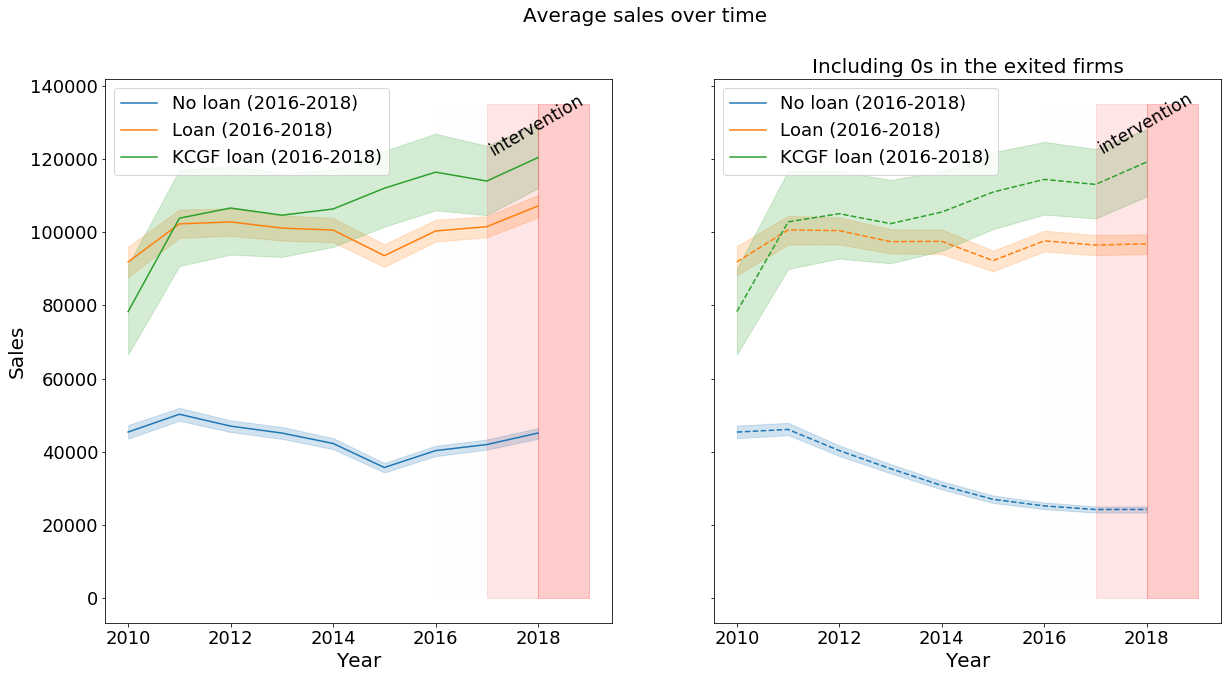

In [45]:
plot_time_series('Sales', hue_variable='type_firm_2015')

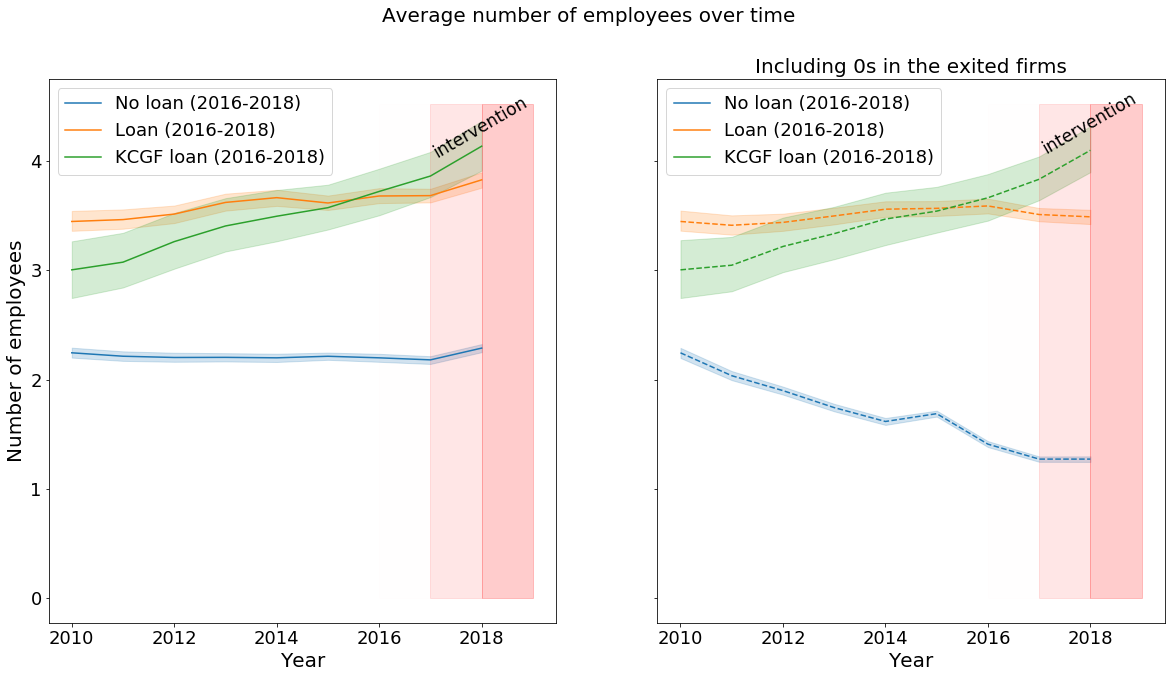

In [44]:
plot_time_series('Number of employees', hue_variable='type_firm_2015')

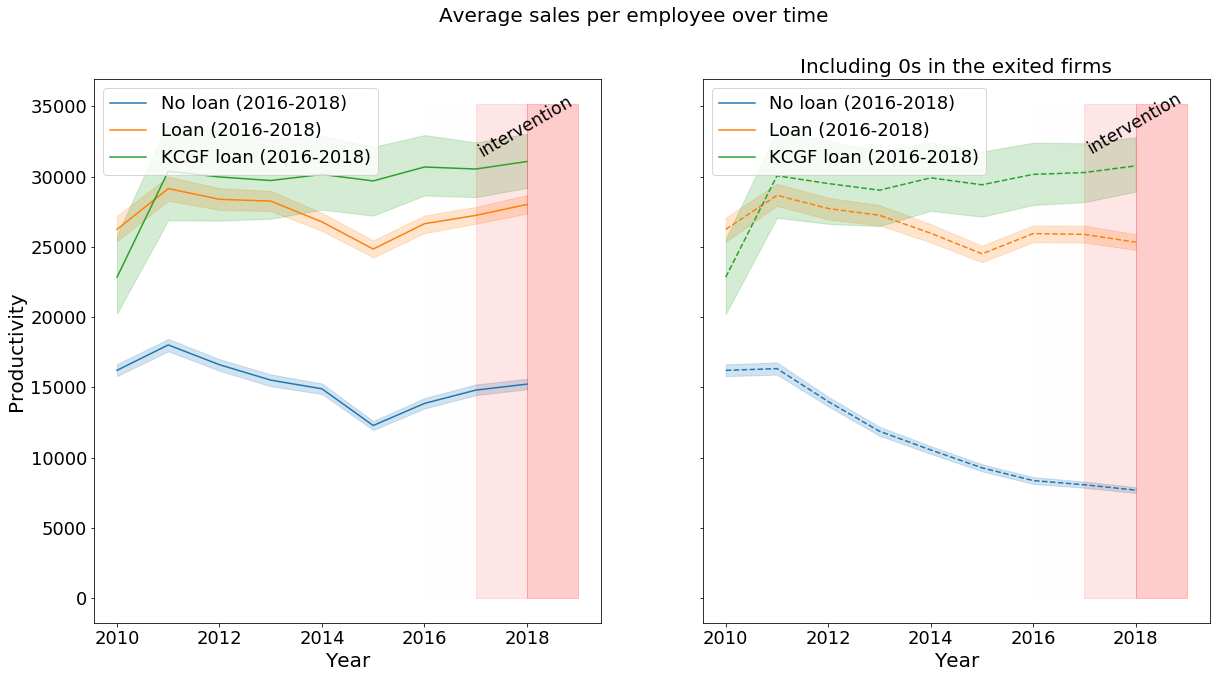

In [46]:
plot_time_series('Productivity', hue_variable='type_firm_2015')

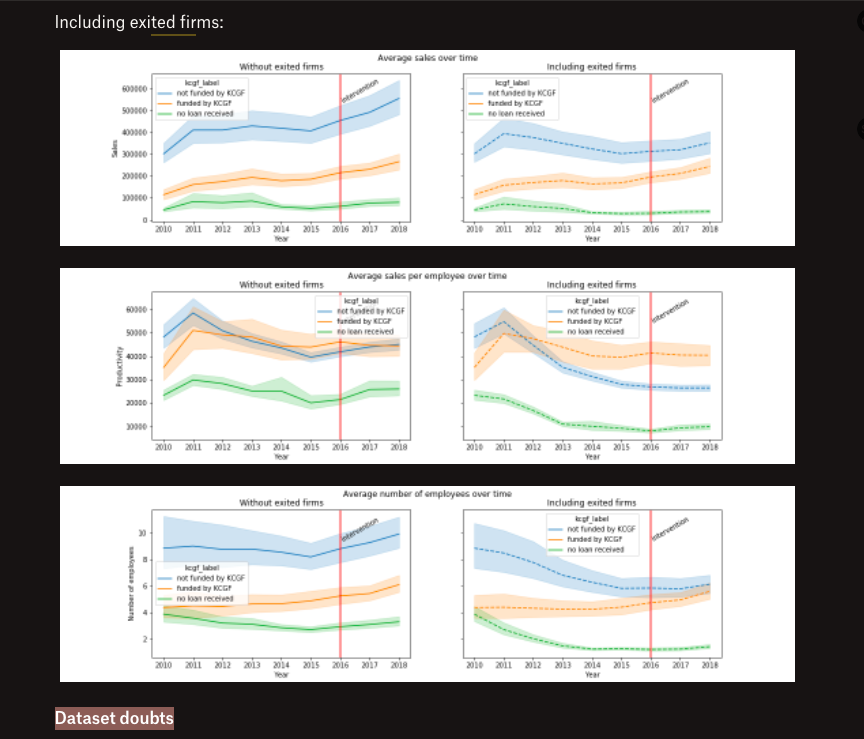

In [47]:
#df_master[[x for x in df_master.columns if 'productivity' in x]]

In [52]:
exc = df_master_excl_exit.groupby(['period', 'type_firm_2015'])[['Number of employees',
       'Sales', 'Productivity']].mean()

In [53]:
not_exc = df_master.groupby(['period', 'type_firm_2015'])[['Number of employees',
       'Sales', 'Productivity']].mean()

In [55]:
#print(exc['Number of employees'] - not_exc['Number of employees'])
#print(exc['Sales'] - not_exc['Sales'])
#print(exc['Productivity'] - not_exc['Productivity'])

# Histograms

## kde plots

In [56]:
def plot_distributions(variable, kind='kde', hue='type_firm_2015', lower_quantile=None, 
                       upper_quantile=None, paint_median=False):
    #mean_amount = df_master[variable].mean()
    median_amount = df_master[variable].median()
    q_upper = df_master[variable].quantile(upper_quantile)
    q_lower = df_master[variable].quantile(lower_quantile)
        
    trimmed_data = df_master[(df_master[variable] >= q_lower) & (df_master[variable] <= q_upper)
                             & (df_master['main_dataset'] == 'Tax/Credit Registry')]
    
    fig = sns.displot(trimmed_data, 
                      x=variable,
                      #bins=11, 
                      #hist_kws={'range': (0.0, 10.0)},
                      #kde_kws={'clip': (0.0, 9.0)},
                      kind=kind, 
                      hue=hue,
                      height=4,
                      aspect=2,

                      #norm_hist=True,
                      )

    sns.move_legend(fig, 'center', bbox_to_anchor=(.55, .45), title='Credit treatment status')
    
    if paint_median:
        #plt.axvline(mean_amount, 0, 1, c='red')
        #plt.text(mean_amount, 0, 'mean \namount', rotation=30)
        plt.axvline(median_amount, 0, 1, c='red')
        plt.text(median_amount, 0, 'median \namount', rotation=30)
    plt.title(variable, fontsize=14)
        
    if lower_quantile==0 and upper_quantile==1:
        note=''
    else:
        note = f' (Distribution has been trimmed to x between {int(100*lower_quantile)} & {int(100*upper_quantile)}th percentile to exclude extreme outliers)'
    
    if variable == 'Sales':
        note_eur = ' in 2018 EUR'
    elif variable == 'Productivity':
        note_eur = ' (Sales in 2018 EUR divided by Number of employees)'
    elif variable == 'approvedamount_eu_r':
        note_eur = ' (loan amount in 2018 EUR)'
    else:
        note_eur = ''
    
    plt.xlabel(f'{variable}' + note_eur + '\n' + note)
    plt.ylabel('Density')
    
    fig.fig.text(0.3, 0.85, '*Source: Kosovo Tax Registry', fontsize=9) #add text
        
    plt.xticks(rotation=30)

    plt.savefig(f'../../data/output/graphs/histograms/{variable}.pdf', bbox_inches='tight')

    plt.show()
    



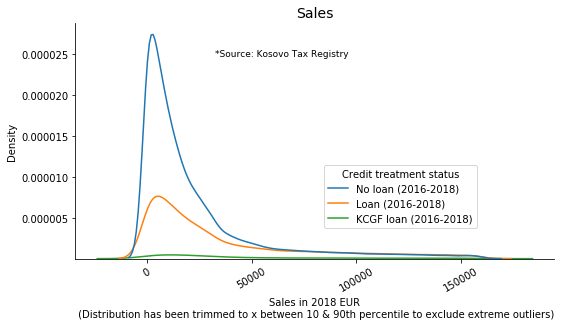

In [57]:
plot_distributions('Sales', lower_quantile=0.1, upper_quantile=0.9)

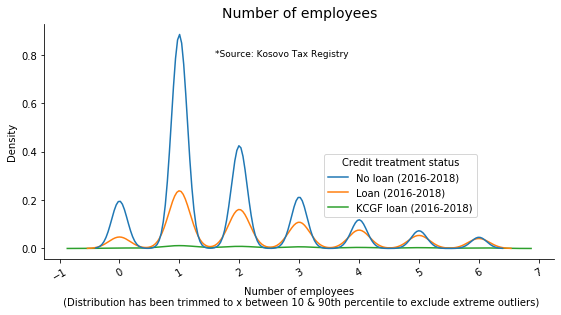

In [58]:
plot_distributions('Number of employees', lower_quantile=0.1, upper_quantile=0.9)

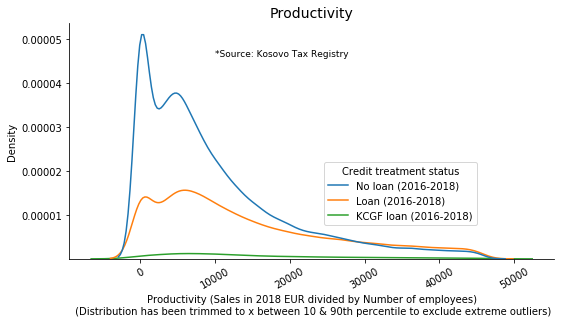

In [59]:
plot_distributions('Productivity', lower_quantile=0.1, upper_quantile=0.9)

In [60]:
#plot_distributions('export_tx', lower_quantile=0.02, upper_quantile=0.98)

In [62]:
#plot_distributions('approvedamount_eu_r', lower_quantile=0.1, upper_quantile=0.9, paint_median=True)

## pie charts

In [57]:
df_master['had_loan_up2015'] = df_master.had_loan_up2015.replace({'Firm without loan between before 2016':
                                                                     'Firm without loan before 2016'})

In [58]:
df_master.type_firm_2015.value_counts(dropna=False)

NaN                                           413478
No loan between 2016-2018                      42582
Loan not covered by KCGF between 2016-2018     13688
Loan covered by KCGF between 2016-2018           994
Name: type_firm_2015, dtype: int64

In [59]:
df_2015 = df_master[(df_master.period==2015) & 
                    (df_master.main_dataset=='Tax/Credit Registry') & 
                    (df_master.active=='Active firm in year t')]

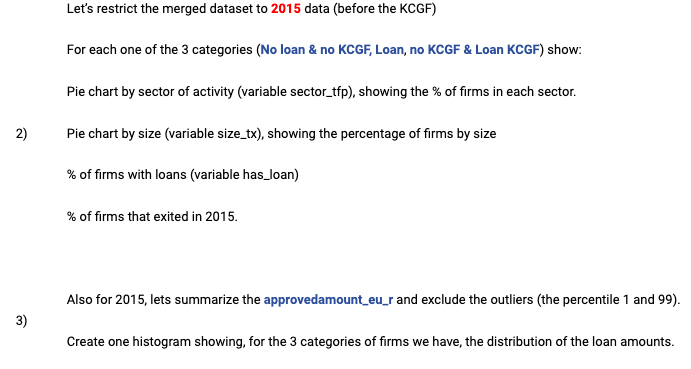

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart(df_2015, variable, subgroup=None, axis=plt, data_index=None, pct_in_legend=False):
    
    if subgroup is not None:
        df_2015 = df_2015[df_2015.type_firm_2015==subgroup]

    if variable == 'has_loan':
        series_2015 = df_2015[variable].map({0:'no loan received', 1:'loan received'})
        
    elif variable == 'exit':
        series_2015 = df_2015[variable].map({0:'survived', 1:'exited'})      
    else:
        series_2015 = df_2015[variable].copy()
    data = series_2015.value_counts(normalize=True)
    colors = sns.color_palette('pastel')[:len(data)]

    if data_index is not None:
        data = data.reindex(data_index)
    
    #create pie chart
    if not pct_in_legend:
        patches, texts, autotexts = axis.pie(data, 
                colors=colors, 
                autopct='%.0f%%',
                )
        plt.legend(data.index, loc="lower left", bbox_to_anchor=(-3 ,-0.0))
        #plt.legend(data.index, loc="upper center", bbox_to_anchor=(-0.2 ,0.9))

    else:
        patches, texts = axis.pie(data, colors=colors)
        labels = [f'{l}: {round(100*s)}%' for l, s in zip(data.index, data)]
        plt.legend(loc="center left", bbox_to_anchor=(-3,0.5), labels=labels)

    if axis==plt:
        axis.title(f'Overall % of firms by {variable}')
    else:
        axis.set_title(f'Overall % of firms by {variable}', rotation=4)

    if subgroup is not None:
        axis.set_title(subgroup)
#    for i, x in enumerate(data):
#        if x < 0.03 and len(data) > 2:
#            texts[i].set_fontsize(4)
#            autotexts[i].set_fontsize(4)

    plt.text(-8.5,0.65,'*Source: Kosovo Tax Registry \nChart for 2015', fontsize=9)
    #plt.text(-6.5,0.65,'*Source: Kosovo Tax Registry \nChart for 2015', fontsize=9)

    if subgroup is None:
        plt.savefig(f'../../data/output/graphs/pie_charts/{variable}_overall.pdf')

    return data.index

In [61]:
#data_index = pie_chart(df_2015, variable='sector_tfp')
#plt.show()
#
#fig, axes = plt.subplots(1, 3, figsize=(13,4))
#
#pie_chart(df_2015, variable='sector_tfp', subgroup='No loan between 2016-2018', axis=axes[0], data_index=data_index)
#pie_chart(df_2015, variable='sector_tfp', subgroup='Loan not covered by KCGF between 2016-2018', axis=axes[1], data_index=data_index)
#pie_chart(df_2015, variable='sector_tfp', subgroup='Loan covered by KCGF between 2016-2018', axis=axes[2], data_index=data_index)
#fig.savefig(f'../../data/output/graphs/pie_charts/sector_tfp_by_subgroup.pdf')
#plt.show()

In [62]:
#data_index = pie_chart(df_2015, variable='size_tx')
#plt.show()
#
#fig, axes = plt.subplots(1, 3, figsize=(12,4))
#
#pie_chart(df_2015, variable='size_tx', subgroup='No loan between 2016-2018', axis=axes[0], data_index=data_index,
#          pct_in_legend=True)
#pie_chart(df_2015, variable='size_tx', subgroup='Loan not covered by KCGF between 2016-2018', axis=axes[1], data_index=data_index,
#          pct_in_legend=True)
#pie_chart(df_2015, variable='size_tx', subgroup='Loan covered by KCGF between 2016-2018', axis=axes[2], data_index=data_index, 
#          pct_in_legend=True)
#plt.savefig(f'../../data/output/graphs/pie_charts/size_tx_by_subgroup.pdf')
#plt.show()

In [63]:
df_2015.had_loan_up2015.value_counts()

Firm without loan before 2016    21742
Fim with loan before 2016        16831
Name: had_loan_up2015, dtype: int64

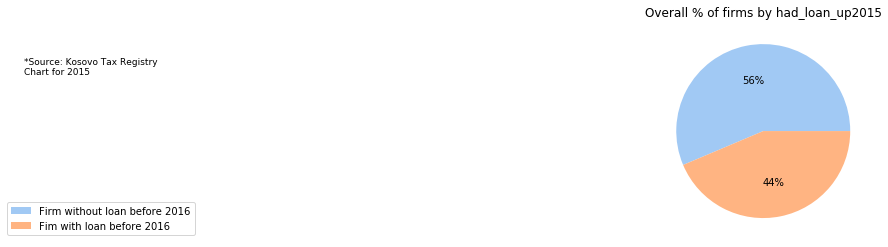

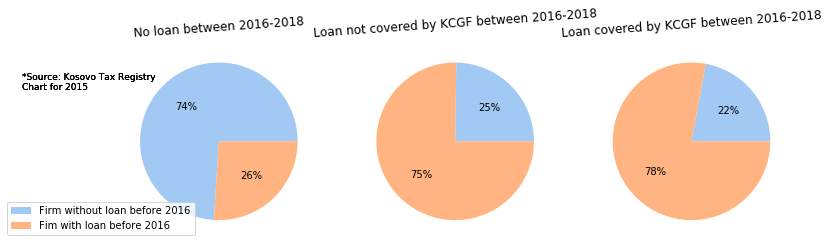

In [64]:
data_index = pie_chart(df_2015, variable='had_loan_up2015')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12,4))

pie_chart(df_2015, variable='had_loan_up2015', subgroup='No loan between 2016-2018', axis=axes[0], data_index=data_index)
pie_chart(df_2015, variable='had_loan_up2015', subgroup='Loan not covered by KCGF between 2016-2018', axis=axes[1], data_index=data_index)
pie_chart(df_2015, variable='had_loan_up2015', subgroup='Loan covered by KCGF between 2016-2018', axis=axes[2], data_index=data_index)
plt.savefig(f'../../data/output/graphs/pie_charts/had_loan_up2015_subgroup.pdf')
plt.show()


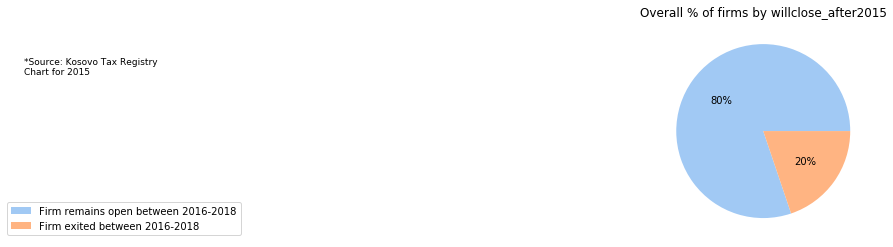

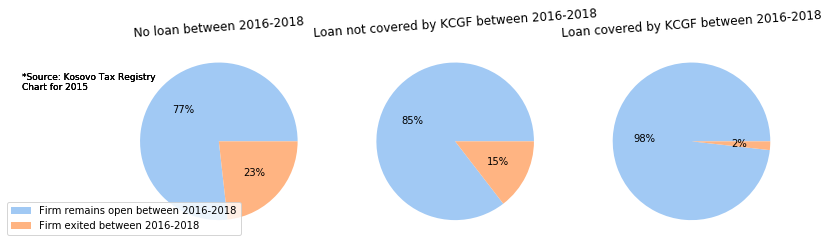

In [66]:
data_index = pie_chart(df_2015, variable='willclose_after2015')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12,4))

pie_chart(df_2015, variable='willclose_after2015', subgroup='No loan between 2016-2018', axis=axes[0], data_index=data_index)
pie_chart(df_2015, variable='willclose_after2015', subgroup='Loan not covered by KCGF between 2016-2018', axis=axes[1], data_index=data_index)
pie_chart(df_2015, variable='willclose_after2015', subgroup='Loan covered by KCGF between 2016-2018', axis=axes[2], data_index=data_index)
plt.savefig(f'../../data/output/graphs/pie_charts/exit_by_subgroup.pdf')
plt.show()
